In [1]:
import numpy as np
from keras import datasets
from keras import models, layers
from keras.utils import np_utils # one hot encoding
import matplotlib.pyplot as plt

(28, 28)
(60000, 28, 28)
(10000, 28, 28)


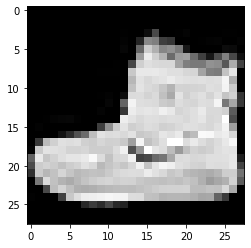

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.fashion_mnist.load_data()

print(X_train[0].shape)
print(X_train.shape)
print(X_test.shape)

plt.imshow(X_train[0])
plt.imshow(X_train[0], cmap='gray')

In [8]:
L, W, H = X_train.shape
X_train = X_train.reshape(-1, W*H)
X_test = X_test.reshape(-1, W*H)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [9]:
X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00392157 0.         0.         0.05098039 0.28627451 

In [10]:
Y_train=np_utils.to_categorical(y_train)
Y_test=np_utils.to_categorical(y_test)

In [11]:
model = models.Sequential()

In [37]:
model.add(layers.Dense(100, activation='relu', input_shape=(W*H, )))
model.add(layers.Dropout(0.5)) #50%
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25)) #25%
model.add(layers.Dense(10, activation='softmax'))

model.compile('adam','categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=20, batch_size=100, validation_split=0.2)
model_eval=model.evaluate(X_test, Y_test, batch_size=100)

print('loss:{}, accuracy:{}'.format(*model_eval))

Epoch 1/20
480/480 [==============================] - 2s 4ms/step - loss: 0.6884 - accuracy: 0.8219 - val_loss: 0.4590 - val_accuracy: 0.8731
Epoch 2/20
480/480 [==============================] - 1s 3ms/step - loss: 0.3034 - accuracy: 0.9160 - val_loss: 0.4671 - val_accuracy: 0.8752
Epoch 3/20
480/480 [==============================] - 1s 3ms/step - loss: 0.2724 - accuracy: 0.9211 - val_loss: 0.4289 - val_accuracy: 0.8792
Epoch 4/20
480/480 [==============================] - 1s 3ms/step - loss: 0.2474 - accuracy: 0.9259 - val_loss: 0.4056 - val_accuracy: 0.8859
Epoch 5/20
480/480 [==============================] - 1s 3ms/step - loss: 0.2341 - accuracy: 0.9287 - val_loss: 0.4195 - val_accuracy: 0.8816
Epoch 6/20
480/480 [==============================] - 1s 3ms/step - loss: 0.2299 - accuracy: 0.9295 - val_loss: 0.4365 - val_accuracy: 0.8760
Epoch 7/20
480/480 [==============================] - 1s 3ms/step - loss: 0.2241 - accuracy: 0.9293 - val_loss: 0.4330 - val_accuracy: 0.8762
Epoch 

In [38]:
def plot_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    
    plt.legend(['Training', 'Validation'])
    
def plot_acc(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    
    plt.legend(['Training', 'Validation'])
    
history=model.fit(X_train, Y_train, epochs=10, batch_size=100, validation_split=0.2)

Epoch 1/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1735 - accuracy: 0.9422 - val_loss: 0.4267 - val_accuracy: 0.8863
Epoch 2/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1764 - accuracy: 0.9410 - val_loss: 0.4329 - val_accuracy: 0.8842
Epoch 3/10
480/480 [==============================] - 2s 3ms/step - loss: 0.1774 - accuracy: 0.9400 - val_loss: 0.4426 - val_accuracy: 0.8770
Epoch 4/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1794 - accuracy: 0.9406 - val_loss: 0.4041 - val_accuracy: 0.8865
Epoch 5/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9442 - val_loss: 0.4416 - val_accuracy: 0.8826
Epoch 6/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1679 - accuracy: 0.9448 - val_loss: 0.4448 - val_accuracy: 0.8788
Epoch 7/10
480/480 [==============================] - 1s 3ms/step - loss: 0.1662 - accuracy: 0.9452 - val_loss: 0.4594 - val_accuracy: 0.8818
Epoch 

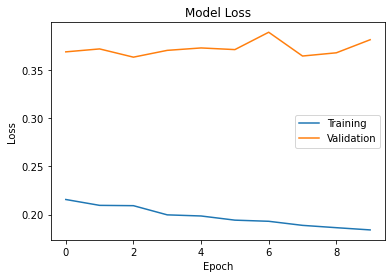

In [18]:
plot_loss(history)

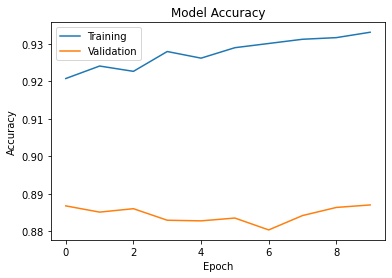

In [19]:
plot_acc(history)

### Image Data Plotting

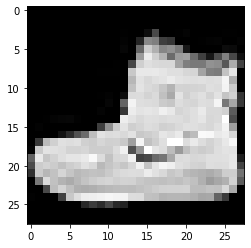

In [23]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

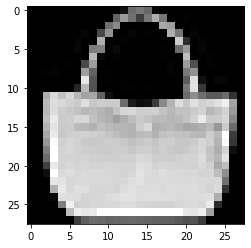

In [24]:
plt.imshow(X_train[100].reshape(28,28), cmap='gray')

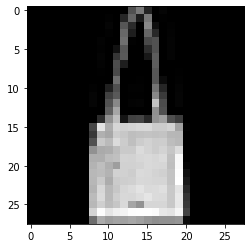

In [25]:
plt.imshow(X_train[200].reshape(28,28), cmap='gray')

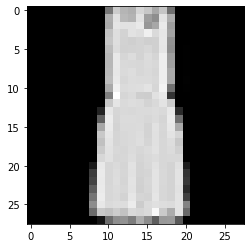

In [26]:
plt.imshow(X_train[30000].reshape(28,28), cmap='gray')

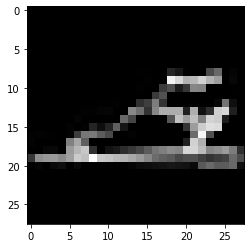

In [27]:
plt.imshow(X_train[300].reshape(28,28), cmap='gray')

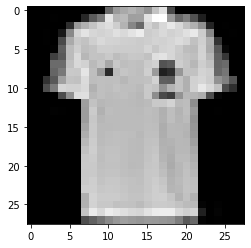

In [28]:
plt.imshow(X_train[2300].reshape(28,28), cmap='gray')

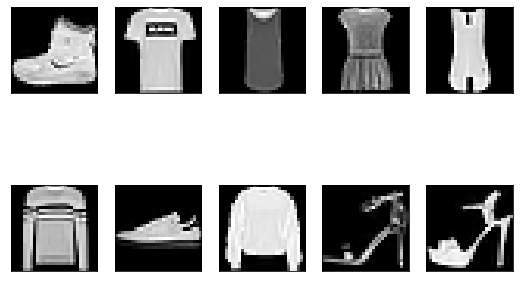

In [36]:
row=2
col=5

grid = range(10)
fig, axs = plt.subplots(nrows=row, ncols=col, figsize=(9,6), 
                        subplot_kw={'xticks':[], 'yticks':[]})

for ax, index in zip(axs.flat, grid):
    ax.imshow(X_train[index].reshape(28,28), cmap='gray')
    
plt.show()